<a href="https://colab.research.google.com/github/learnvisionAI/ObjectDetection_YOLO/blob/main/Session1_YOLOV8_Inference/YOLOv8_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLOv8 is trained for Object Detection and Image Segmentation and Image Classification Tasks. We will run Object Detection and Image Segementation tasks in this Tutorial**

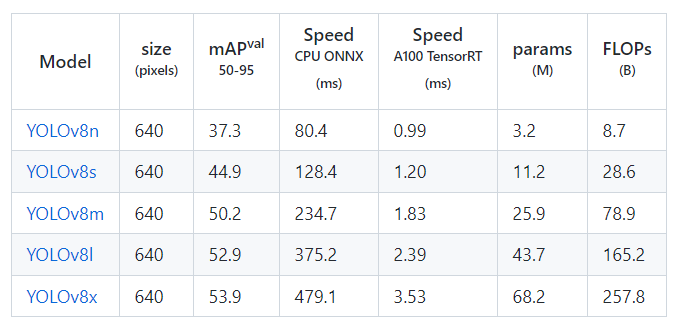

#Before Running The Script, Please Make Sure, You Have Selected the Run Time as GPU

#**Import the Required Library**

In [ ]:
from IPython.display import Image

#**Install Ultralytics Library**

In [ ]:
!pip install ultralytics==8.0.0

#**Check Whether the GPU is Available or Not**

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.__version__

#**Download Sample Image and Video From the Google Drive into the Google Colab Notebook**

In [ ]:
!gdown 'https://drive.google.com/uc?id=18ZfrEaZ52sVJ5HgSaCLlOAN4gFnjwv6r&confirm=t'

#**Object Detection**

#**Run Object Detection on a Sample Image**

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image1.jpg'

#**Display the Output Image**

In [ ]:
Image('/content/runs/detect/predict2/image1.jpg')

#**To save the Bounding Box Information set save_txt=True**

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_txt=True

#**Display the Output Image**

In [ ]:
Image('/content/runs/detect/predict13/image2.jpg')

# To display objects only with high confidence score

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_txt=True conf=0.9

In [ ]:
Image('/content/runs/detect/predict15/image2.jpg')

#**To save the "Crop Object"  set save_crop=True**

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' save_crop=True conf=0.95

#**Display the Output Image**

In [ ]:
Image('/content/runs/detect/predict16/crops/bus/image2.jpg')

#**To remove the confidence values and labels, we will use hide_labels and hide_conf Flags**

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/image2.jpg' hide_labels=True hide_conf=True

#**Display the Output Image**

In [ ]:
Image('/content/runs/detect/predict6/image2.jpg')

#**Run Object Detection on Videos**

In [ ]:
!gdown 'https://drive.google.com/uc?id=18ZL9J13J5kfUaoLUH3ccK4zvUBI9mMA9&confirm=t'

In [ ]:
!yolo task=detect mode=predict model=yolov8s.pt source='/content/demo.mp4'

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict5/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Image Segmentation**

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/image1.jpg' hide_labels=True

#**Dispay the Output Image**

In [ ]:
Image('/content/runs/segment/predict2/image1.jpg')

#**Hide Labels and Confidence Value**

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/image1.jpg'  hide_labels=True hide_conf=True

#**Display the Output Image**

In [ ]:
Image('/content/runs/segment/predict/image1.jpg')

#**Run Segmentation on Video**

In [ ]:
!gdown 'https://drive.google.com/uc?id=18jukezIRvPtESS3AWiwbtqsKlXtZFJkq&confirm=t'

In [ ]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/cars.mp4'

#**Display the Output Video for Segmentation**

In [ ]:
!rm  "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Export Model in ONNX Format**

#**Detection**

In [ ]:
!yolo task=detect mode=export model=yolov8s.pt format=onnx

#**Segmentation**

In [ ]:
!yolo task=segment mode=export model=yolov8s-seg.pt format=onnx

#**To Do All this in Python Instead of Command Line**

#**For Image**

In [ ]:
from ultralytics import YOLO

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Predict Method Takes all the parameters of the Command Line Interface
model.predict(source='/content/image1.jpg',  save=True, conf=0.5,save_txt=True)

#**Display the Output Image**

In [ ]:
Image('/content/runs/detect/predict6/image1.jpg')

#**For Video**

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Predict Method Takes all the parameters of the Command Line Interface
model.predict(source='/content/demo.mp4',  save=True, conf=0.5, save_txt = False)

#**Display the Output Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict7/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**To Export the Model in the onnx Format comment model.predict line and add the model.export()**

In [ ]:
#Initialize YOLO with the model name
model = YOLO("yolov8m.pt")
#Export the Model in the onnx format
model.export(format="onnx")